# LEAD SCORING CASE STUDY

## Problem Statement
An X Education need assistance to choose the most potential leads, for example the leads that are probably going to change over into paying clients. The organization expects us to build a model wherein you need to assign a lead score to every one of the leads to such an extent that the clients with higher lead score have a higher conversion possibility and the clients with lower lead score have a lower conversion  possibility. The CEO, specifically, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals & Objectives
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which this model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. 

### Steps followed are :
1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### IMPORT REQUIRED MODULES

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
#import matplot as plt ,seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import time, warnings
import datetime as dt
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Step 1: Read and understand the data

In [2]:
# Importing all datasets
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [3]:
# Understanding the data types of all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Shape of the dataset 
df.shape

(9240, 37)

In [5]:
#Understanding the numerical values using describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000,9240.000,9103.000,9240.000,9103.000,5022.000,5022.000
mean,617188.436,0.385,3.445,487.698,2.363,14.306,16.345
std,23405.996,0.487,4.855,548.021,2.161,1.387,1.811
min,579533.000,0.000,0.000,0.000,0.000,7.000,11.000
25%,596484.500,0.000,1.000,12.000,1.000,14.000,15.000
50%,615479.000,0.000,3.000,248.000,2.000,14.000,16.000
75%,637387.250,1.000,5.000,936.000,3.000,15.000,18.000
max,660737.000,1.000,251.000,2272.000,55.000,18.000,20.000


## Step2 : Clean the Data

In [6]:
# Converting all the str values to lower case 
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# Substituting 'Select' with 'NaN' as select is chossen for unknown categories.
df = df.replace('select',np.nan)

In [8]:
# Check the unique values for each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns as they are of no use for analysis 
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

### Checking for Outliers

In [10]:
# Checking for outliers in the continuous variables
num_df = df[['Lead Number','Converted','TotalVisits', 'Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [11]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000,9240.000,9103.000,9240.000,9103.000,5022.000,5022.000
mean,617188.436,0.385,3.445,487.698,2.363,14.306,16.345
std,23405.996,0.487,4.855,548.021,2.161,1.387,1.811
min,579533.000,0.000,0.000,0.000,0.000,7.000,11.000
25%,596484.500,0.000,1.000,12.000,1.000,14.000,15.000
50%,615479.000,0.000,3.000,248.000,2.000,14.000,16.000
75%,637387.250,1.000,5.000,936.000,3.000,15.000,18.000
90%,650506.100,1.000,7.000,1380.000,5.000,16.000,19.000
95%,655404.050,1.000,10.000,1562.000,6.000,17.000,20.000
99%,659592.980,1.000,17.000,1840.610,9.000,17.000,20.000


In [12]:
#Function for checking Outliers
def outliers_Skewed_check(lst):
    for i in lst:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.boxplot(df[i],color="green")
        plt.title("Box plot of "+ i)
        plt.subplot(1,2,2)
        sns.distplot(df[i])
        plt.title("distribution plot of "+ i)
        plt.axvline(df[i].mean(), color="black")
        plt.axvline(df[i].median(), color="green")
        plt.show()

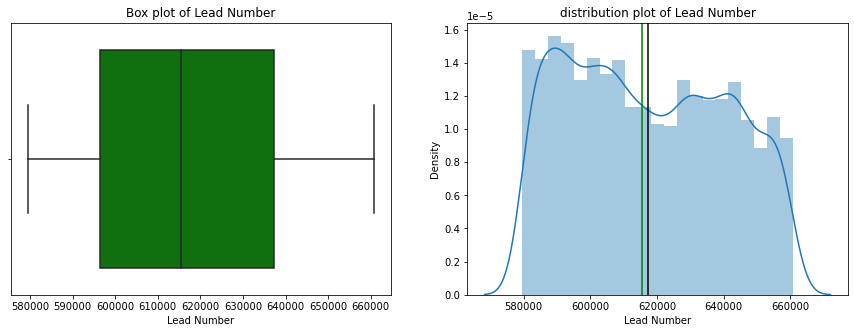

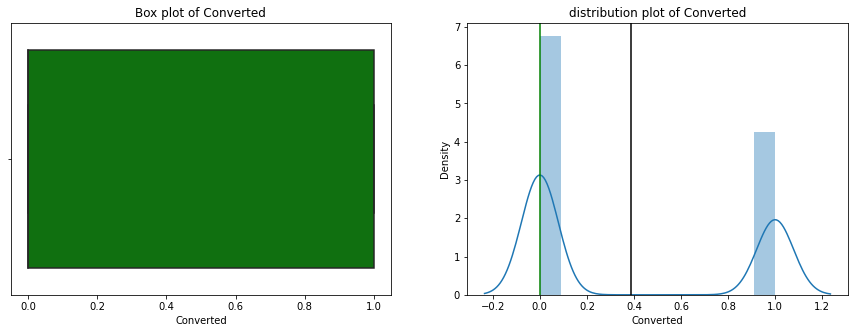

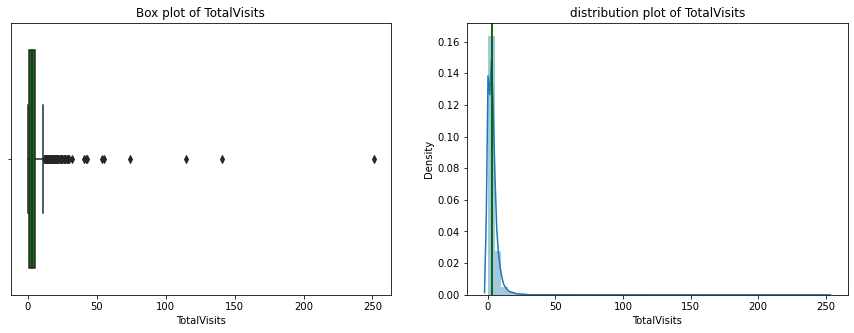

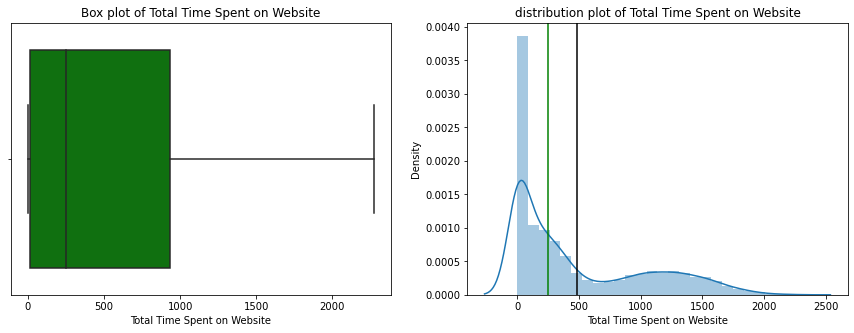

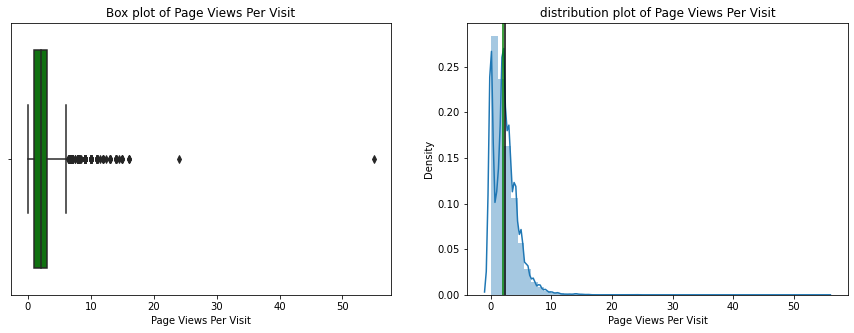

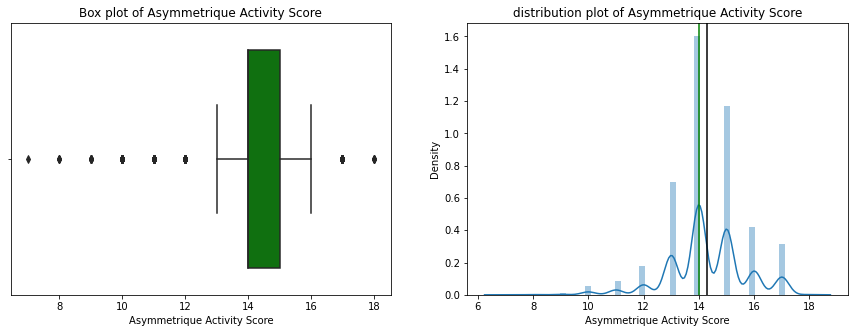

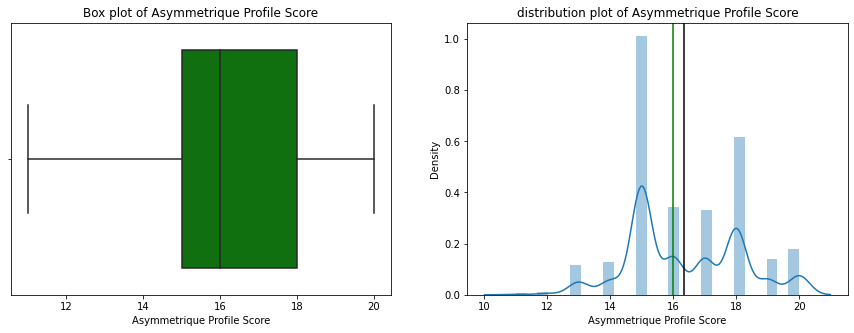

In [13]:
#Checking Outliers for numerical columns
outliers_Skewed_check(num_df)

### Checking for Missing Values and Inputing Them

In [14]:
#Analysing Missing Values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [15]:
# Creating Data Frames with the percentage of Missing Values
temp=df.isnull().mean().reset_index().rename(columns={"index":"column Name",0:"Missing value"}).sort_values(by="Missing value",ascending=False)
temp

,column Name,Missing value
13,How did you hear about X Education,0.785
24,Lead Profile,0.742
23,Lead Quality,0.516
29,Asymmetrique Profile Score,0.456
28,Asymmetrique Activity Score,0.456
27,Asymmetrique Profile Index,0.456
26,Asymmetrique Activity Index,0.456
25,City,0.397
12,Specialization,0.366
22,Tags,0.363


In [16]:
#Dropping all the columns having more than 37% of missing values
drop_columns=list(temp[temp["Missing value"]>0.37]["column Name"])
len(drop_columns)
df=df.drop(drop_columns,axis=1)

In [17]:
# Dropping column Tags as it has huge missing values> 36% 
df=df.drop('Tags',axis=1)

In [18]:
#Rechecking the missing values % 
temp=df.isnull().mean().reset_index().rename(columns={"index":"column Name",0:"Missing value"}).sort_values(by="Missing value",ascending=False)
temp

,column Name,Missing value
12,Specialization,0.366
14,What matters most to you in choosing a course,0.293
13,What is your current occupation,0.291
11,Country,0.266
7,TotalVisits,0.015
9,Page Views Per Visit,0.015
10,Last Activity,0.011
3,Lead Source,0.004
15,Search,0.000
21,A free copy of Mastering The Interview,0.000


We can see there are columns which still have huge missing values . We will analyse them individually and treat those null values.

In [19]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums             

Specialization column has 36.6% of missing values, though it has significant missing values we are not dropping as this variable seems relevant and important for analysis. so we will analyse this variable further to fill the missing values with appropriate values.

In [20]:
#Specilization variable understanding 
df['Specialization'].value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

In [21]:
df['Specialization'].mode()[0]

'finance management'

We can see that null values in specialization variable cannot be substituted with mode as it will be skewed,so we will introduce a category named- 'Missing' to fill the null values.

In [22]:
df['Specialization'] = df['Specialization'].fillna('Missing')
df['Specialization'].value_counts()

Missing                              3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

Similarly for columns - 'What matters most to you in choosing a course', 'What is your current occupation', 'Country' has approximately 30%, 30%, 27% of missing values respectively, though it has significant missing values we are not dropping as this variable seems relevant and important for analysis. So we will analyse this variable further to fill the missing values with appropriate values.

In [23]:
#'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
df['What matters most to you in choosing a course'].mode()[0]

'better career prospects'

In [25]:
#What is your current occupation column undersatnding 
df['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
df['What is your current occupation'].mode()[0]

'unemployed'

In [27]:
#country column understanding 
df['Country'].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [28]:
df['Country'].mode()[0]

'india'

In [29]:
# Imputing the Columns having null values with new category -Missing 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Missing')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Missing')
df['Country'] = df['Country'].fillna('Missing')

We are dropping columns Prospect ID and Lead Number , as they are unique ids which wont be relevant for analysis

In [30]:
#dropping 'Prospect ID', 'Lead Number' columns
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [31]:
#Rechecking the missing values % 
temp=df.isnull().mean().reset_index().rename(columns={"index":"column Name",0:"Missing value"}).sort_values(by="Missing value",ascending=False)
temp

,column Name,Missing value
5,TotalVisits,0.015
7,Page Views Per Visit,0.015
8,Last Activity,0.011
1,Lead Source,0.004
0,Lead Origin,0.000
13,Search,0.000
19,A free copy of Mastering The Interview,0.000
18,Through Recommendations,0.000
17,Digital Advertisement,0.000
16,Newspaper,0.000


Now we can see few null values in the data . so we will proceed our analysis with theose variables.


In [32]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [33]:
# Dropping the rows having null values
df1 = df[df.isnull().sum(axis=1) <1]

In [34]:
# Checking the % of rows retained after dropping 
round(100*(df1.shape[0])/(df.shape[0]),2)

98.2

In [35]:
# Assigning the df1 dataframe to the actual dataframe df
df=df1

In [36]:
#Rechecking the missing values % 
temp=df.isnull().mean().reset_index().rename(columns={"index":"column Name",0:"Missing value"}).sort_values(by="Missing value",ascending=False)
temp

,column Name,Missing value
0,Lead Origin,0.000
11,What is your current occupation,0.000
19,A free copy of Mastering The Interview,0.000
18,Through Recommendations,0.000
17,Digital Advertisement,0.000
16,Newspaper,0.000
15,X Education Forums,0.000
14,Newspaper Article,0.000
13,Search,0.000
12,What matters most to you in choosing a course,0.000


In [37]:
# Checking the shape of the data set 
df.shape

(9074, 21)

## EDA

### Univariate Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### Categorical variable Univariate Analysis

In [39]:
#Function for plotting of categorical variables
def Univariate(lst):
    l=1
    for i in lst:
        print(l,".",i)
        plt.figure(figsize=(15,10))
        plt.subplot(2,2,1)
        df[i].value_counts(normalize=True).plot.pie(autopct="%1.0f%%")
        plt.title("Plotting % of categories in:"+ i)
       
        plt.subplot(2,2,2)
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.title("Plotting count of each  categories in:"+ i)
        plt.show()
        
        l+=1
        print(" ")

In [40]:
#Categorical columns
cat_df=['Lead Origin','Do Not Email','Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity','Lead Source','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Activity','Converted']

1 . Lead Origin


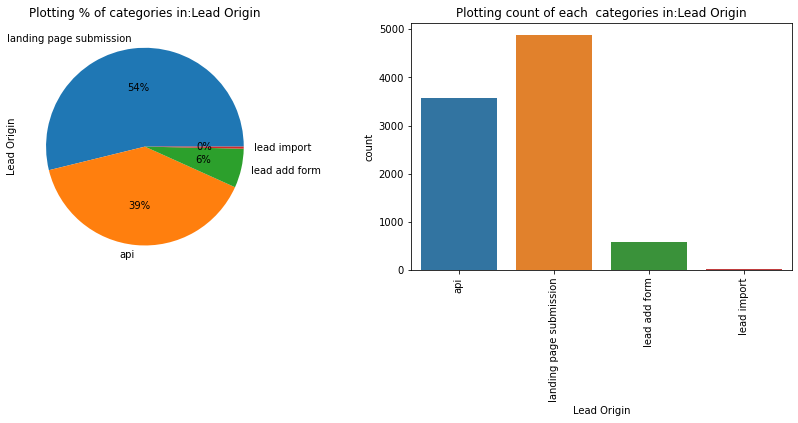

 
2 . Do Not Email


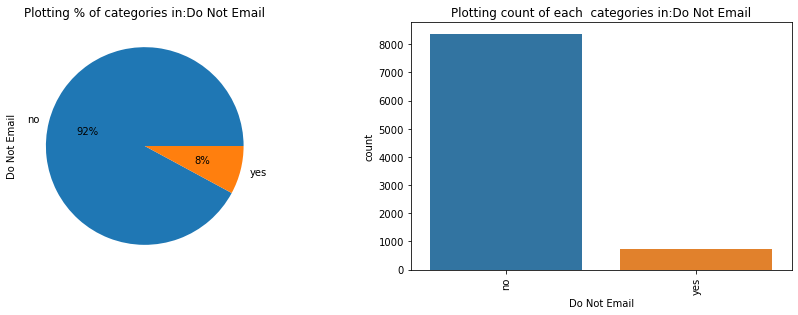

 
3 . Do Not Call


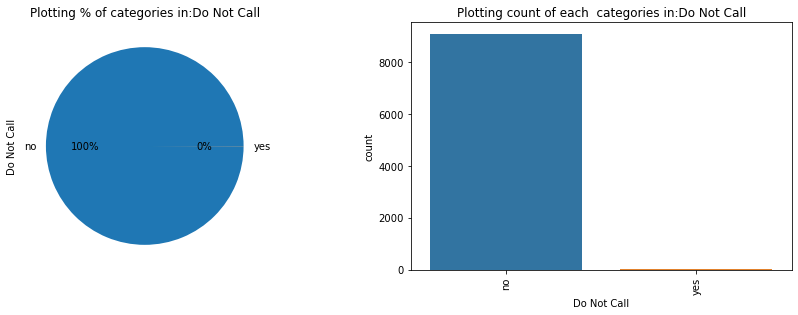

 
4 . Country


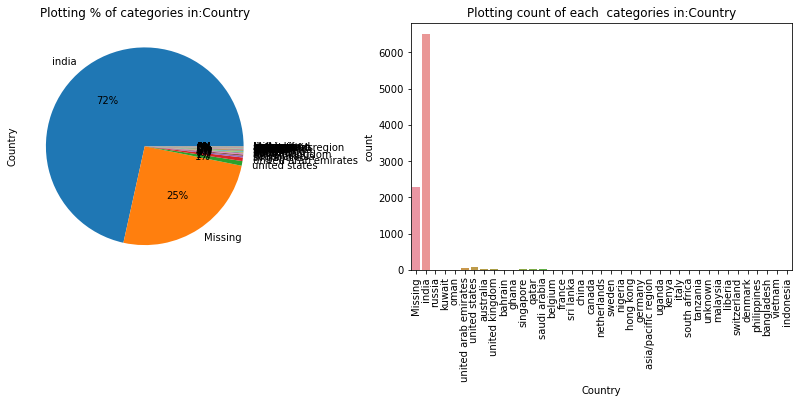

 
5 . Search


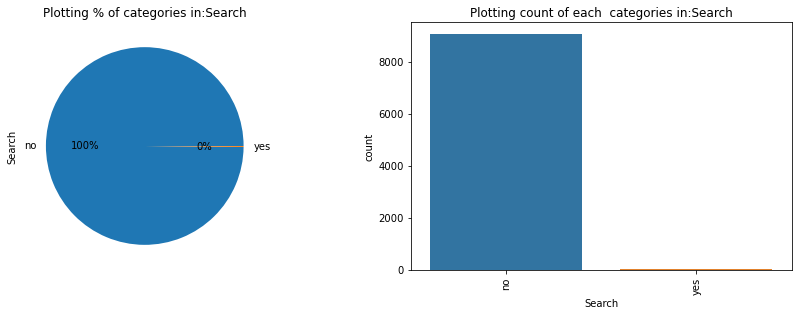

 
6 . Newspaper Article


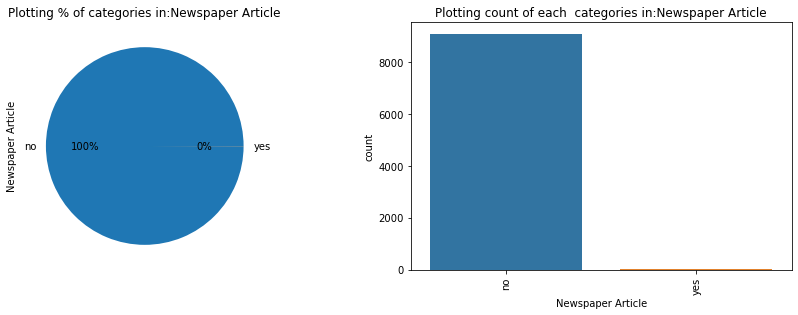

 
7 . X Education Forums


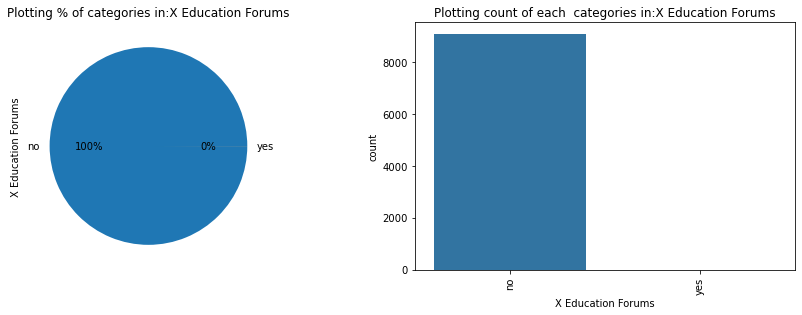

 
8 . Newspaper


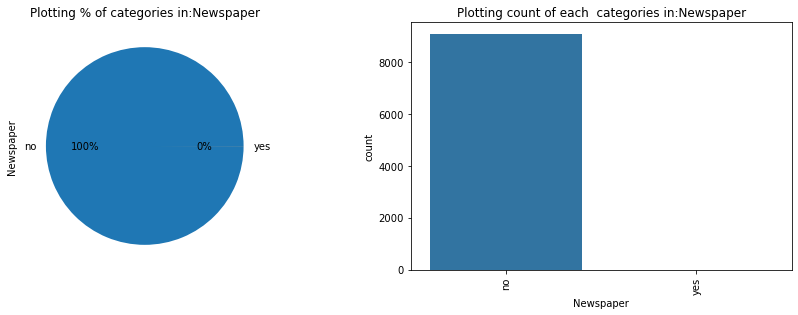

 
9 . Digital Advertisement


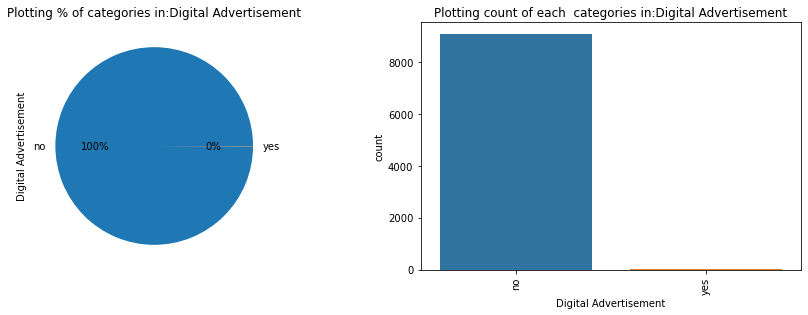

 
10 . Through Recommendations


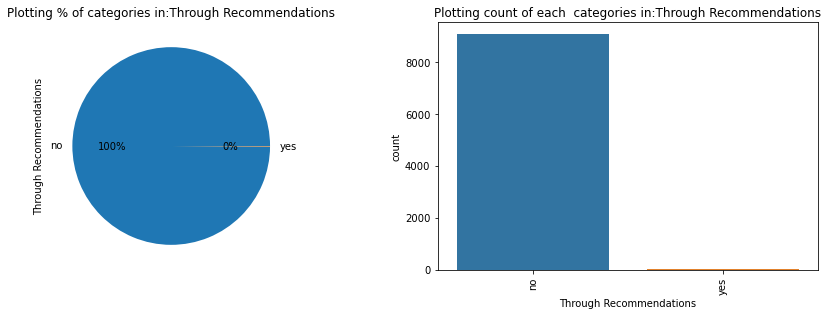

 
11 . A free copy of Mastering The Interview


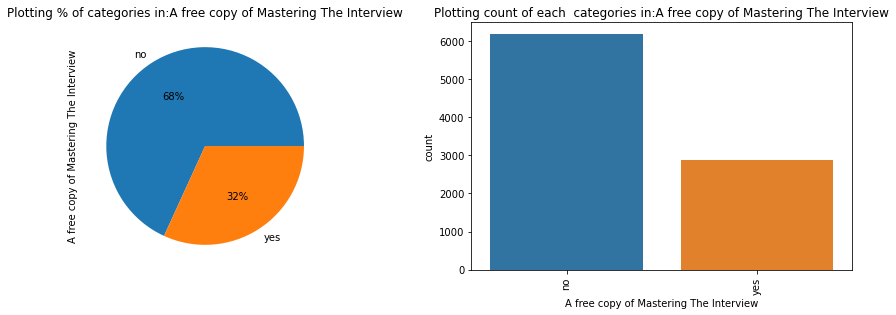

 
12 . Last Notable Activity


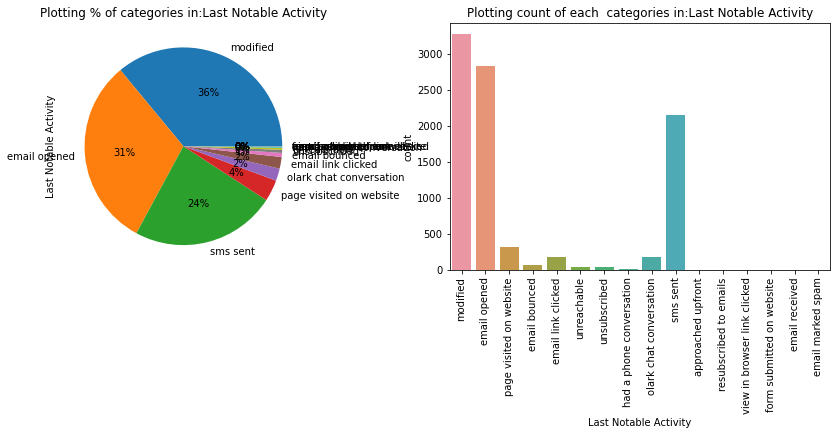

 
13 . Lead Source


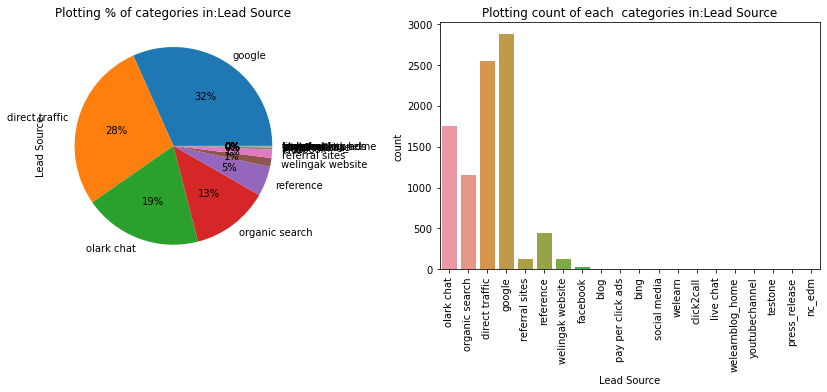

 
14 . Specialization


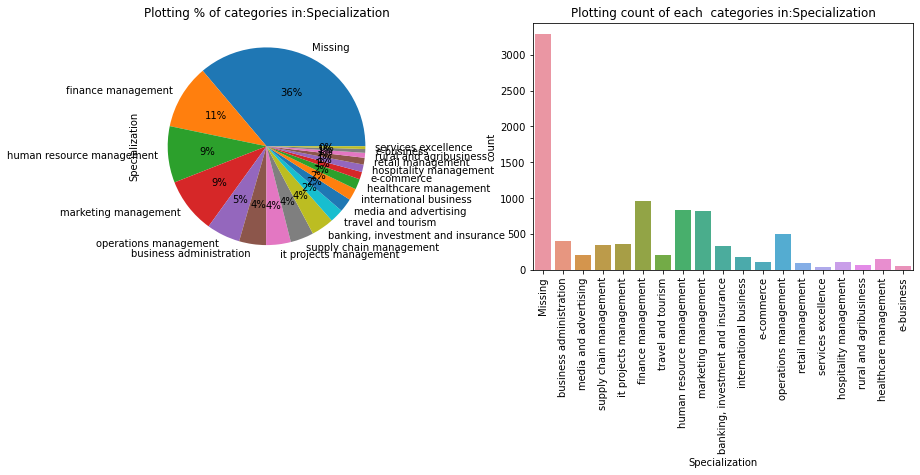

 
15 . What is your current occupation


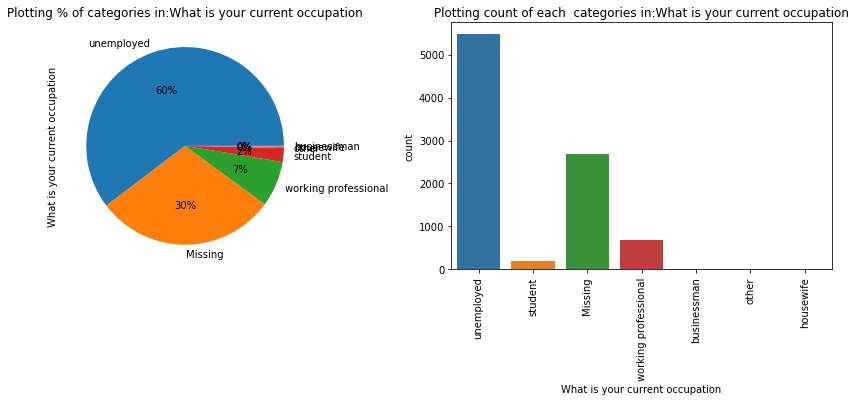

 
16 . What matters most to you in choosing a course


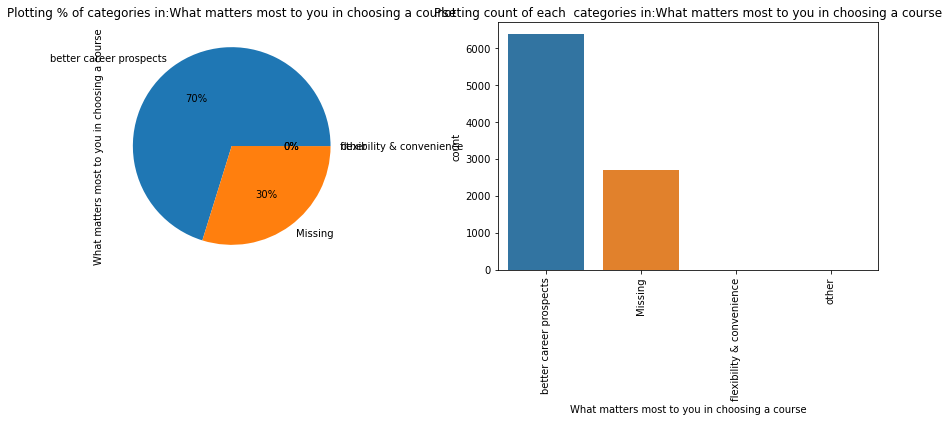

 
17 . Last Activity


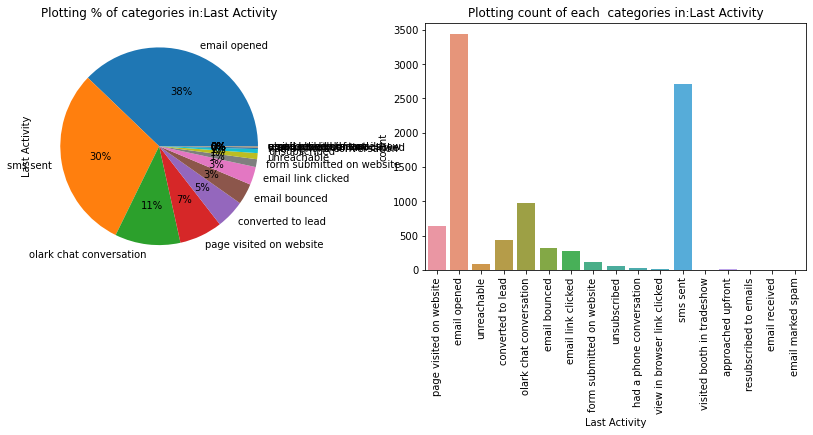

 
18 . Converted


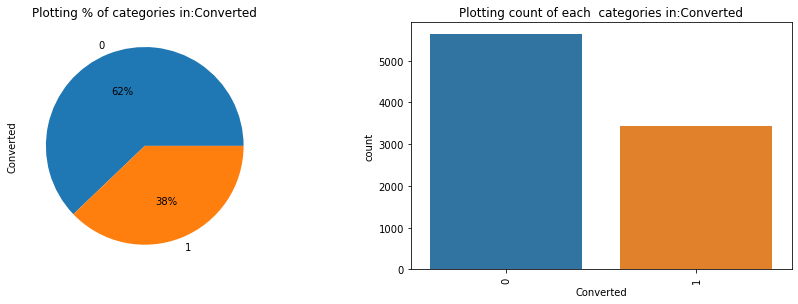

In [41]:
Univariate(cat_df)

#### Univariate analysis observations:
1. 54% of customers were identified as leads from landing page submission.
2. Majority of customers choose to get an email, call.
3. 72% Demography of customers belonged to India. 
4. 32% of customers preferred to get a free copy of mastering the interview.
5. Majority of customers were having modified followed by email opened , sms sent as their last notable activity.
6. Google, direct traffic, Olark chat were the top 3 lead sources.
7. Most of the customers who seemed interested are unemployed followed by working professionals.
8. 70% of customers are looking for better career prospects.
9. Email opened and sms sent were the  activities that are most frequently performed last activity by the customer.
10. Potential Conversion rate is 38%. 

### Numerical variables Univariate Analysis

In [42]:
num_df=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [43]:
#Correlation Matrix for continous columns 
df_corr=df.corr().abs().unstack().sort_values(kind="quicksort").dropna()
df_corr[df_corr!=1.0].sort_values(ascending=False).head(20)

TotalVisits                  Page Views Per Visit          0.511
Page Views Per Visit         TotalVisits                   0.511
Converted                    Total Time Spent on Website   0.359
Total Time Spent on Website  Converted                     0.359
                             Page Views Per Visit          0.318
Page Views Per Visit         Total Time Spent on Website   0.318
TotalVisits                  Total Time Spent on Website   0.220
Total Time Spent on Website  TotalVisits                   0.220
Converted                    TotalVisits                   0.033
TotalVisits                  Converted                     0.033
Converted                    Page Views Per Visit          0.000
Page Views Per Visit         Converted                     0.000
dtype: float64

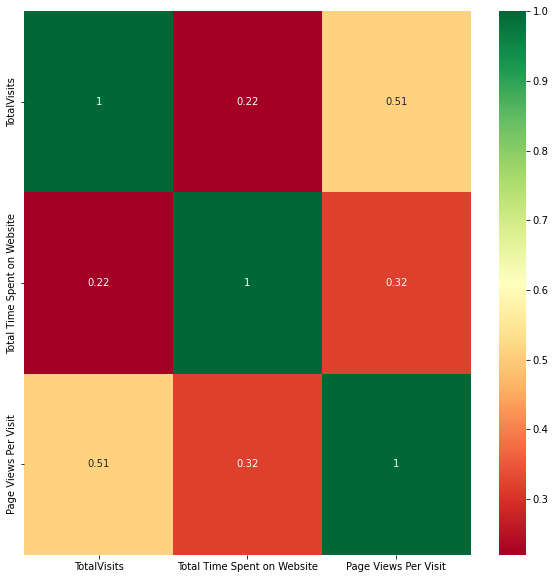

In [44]:
# plotting heat map to find correlation among comtinuous variables  
plt.figure(figsize=(10,10))
sns.heatmap(df[num_df].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [45]:
#Function for Univariate analysis for continous and categorical variable
def Univariate_cont(lst):
    l=1
    for i in lst:
        print(l,".",i)
        sns.boxplot(df[i],color="blue")
        plt.title("Plotting Box plot for :"+ i)
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.hist(df[i],bins=10)
        plt.title("Plotting histogram for:"+ i)
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,2)
        sns.distplot(df[i],hist=False)
        plt.title("Plotting Distribution plot for:"+ i)
        
        plt.show()
        l+=1
        print(" ")

1 . TotalVisits


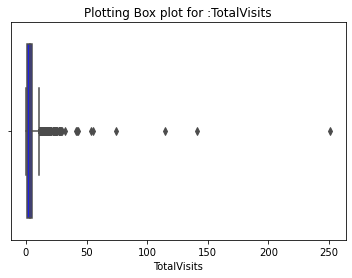

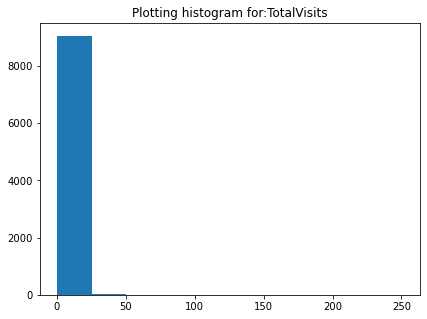

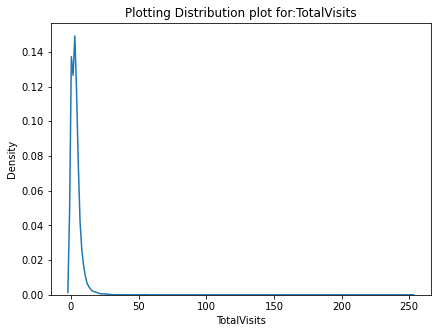

 
2 . Total Time Spent on Website


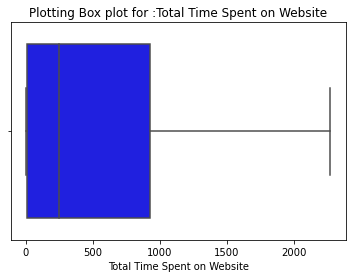

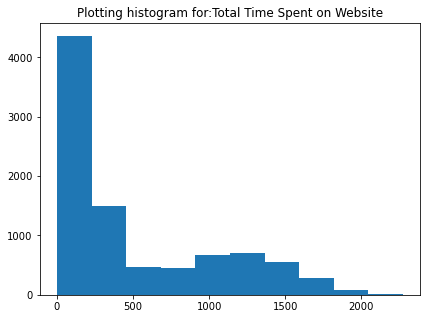

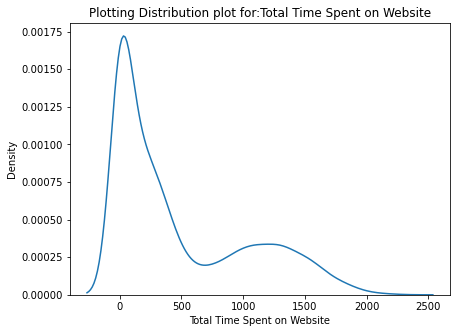

 
3 . Page Views Per Visit


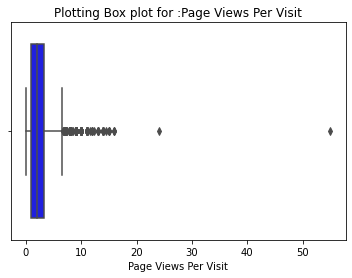

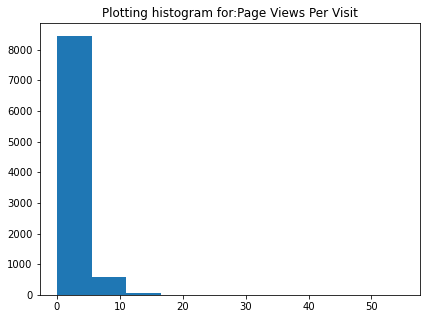

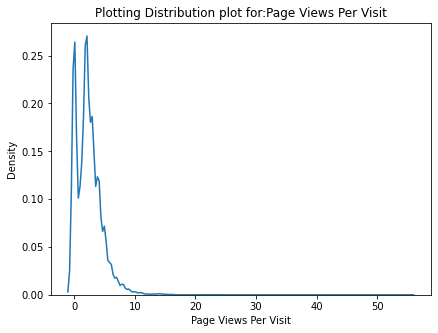

In [46]:
Univariate_cont(num_df)

#### Observations:
- On an average customers spent on Total visits ,Total Time spent on website, Page views per visit were 3, 248 &2 respectively.

### Bivariate Analysis

### Target variable is - Converted which is categorical variable

In [47]:
#Function for Bivariate categorical variables
def bivariate(lst):
    l=1
    for i in lst:
        print(l,".",i)
        print(pd.DataFrame({"Conversion rate":100*(df[i].value_counts(normalize=True)),"Total percent of categories that got converted":100*(df.groupby([i])["Converted"].mean())}).sort_values(by="Conversion rate",ascending=False))
        plt.figure(figsize=(15,10))
        plt.subplot(1,2,1)
        df[i].value_counts(normalize=True).plot.pie(autopct="%1.0f%%")
        plt.title("Plotting % of categories in:"+ i)
       
        plt.subplot(1,2,2)
        sns.countplot(x=df[i],hue='Converted',data= df).tick_params(axis='x', rotation = 90)
        plt.xticks(rotation=90)
        plt.title("Plotting count of each  categories in:"+ i)
        plt.show()
    
        l+=1
        print(" ")

1 . Lead Origin
                         Conversion rate  \
landing page submission           53.835   
api                               39.431   
lead add form                      6.403   
lead import                        0.331   

                         Total percent of categories that got converted  
landing page submission                                          36.172  
api                                                              31.163  
lead add form                                                    93.632  
lead import                                                      30.000  


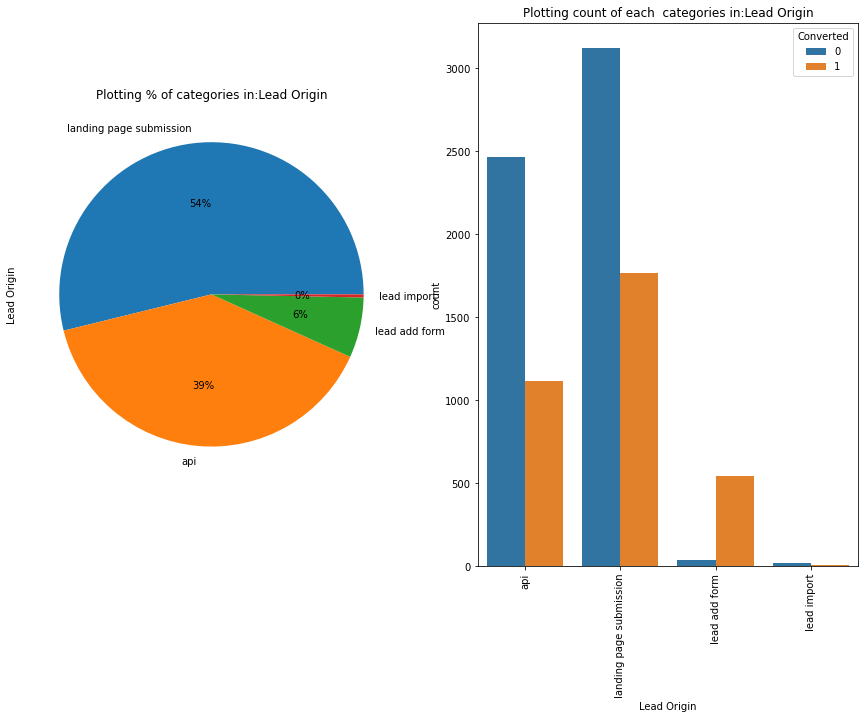

 
2 . Do Not Email
     Conversion rate  Total percent of categories that got converted
no            92.109                                          39.854
yes            7.891                                          14.525


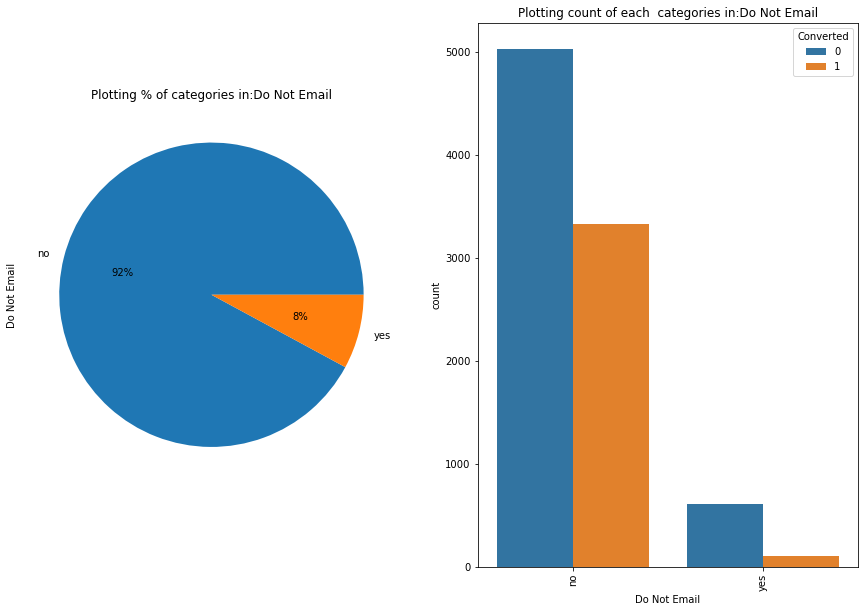

 
3 . Do Not Call
     Conversion rate  Total percent of categories that got converted
no            99.978                                          37.842
yes            0.022                                         100.000


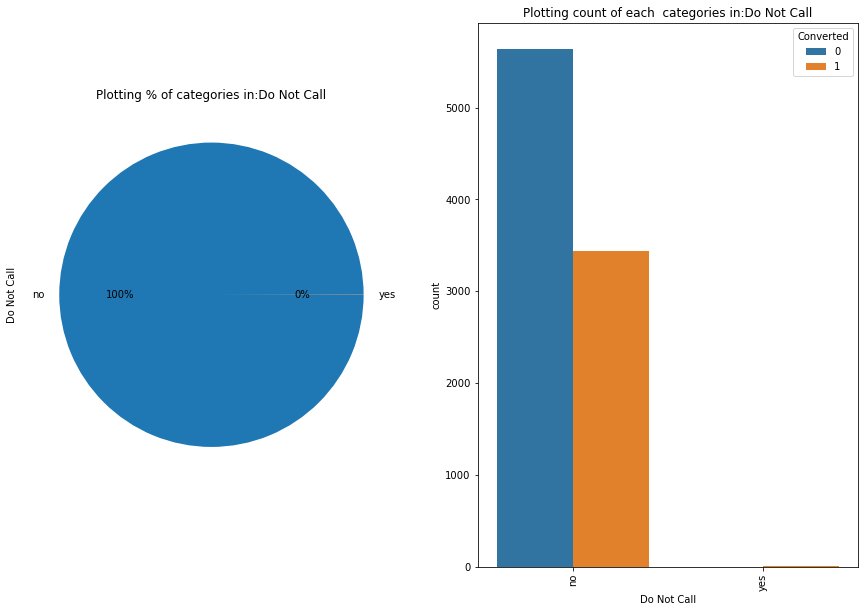

 
4 . Country
                      Conversion rate  \
india                          71.534   
Missing                        25.303   
united states                   0.760   
united arab emirates            0.584   
singapore                       0.264   
saudi arabia                    0.231   
united kingdom                  0.165   
australia                       0.143   
qatar                           0.110   
hong kong                       0.077   
bahrain                         0.077   
oman                            0.066   
france                          0.066   
unknown                         0.055   
south africa                    0.044   
canada                          0.044   
nigeria                         0.044   
germany                         0.044   
kuwait                          0.044   
sweden                          0.033   
netherlands                     0.022   
asia/pacific region             0.022   
philippines                     0.022   
gh

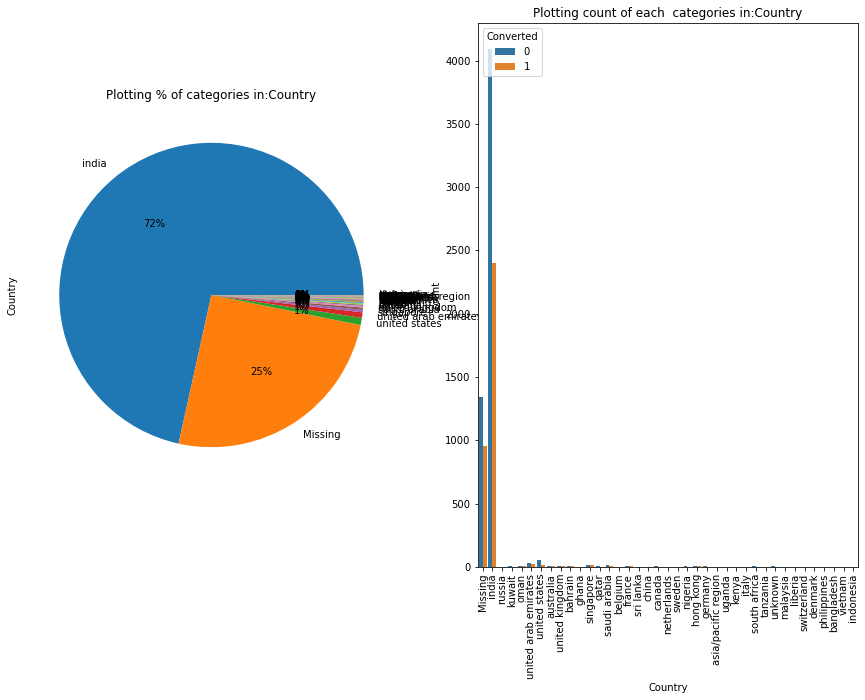

 
5 . Search
     Conversion rate  Total percent of categories that got converted
no            99.846                                          37.859
yes            0.154                                          35.714


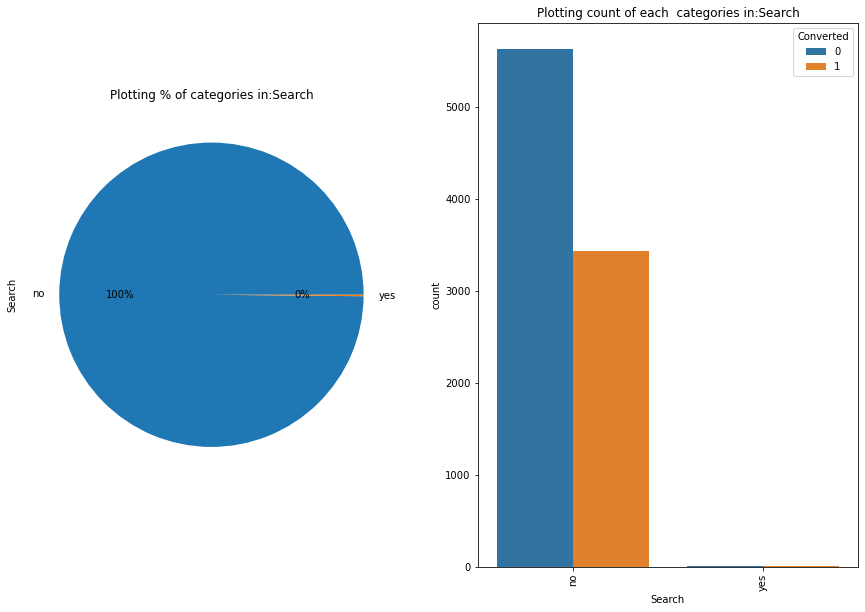

 
6 . Newspaper Article
     Conversion rate  Total percent of categories that got converted
no            99.978                                          37.853
yes            0.022                                          50.000


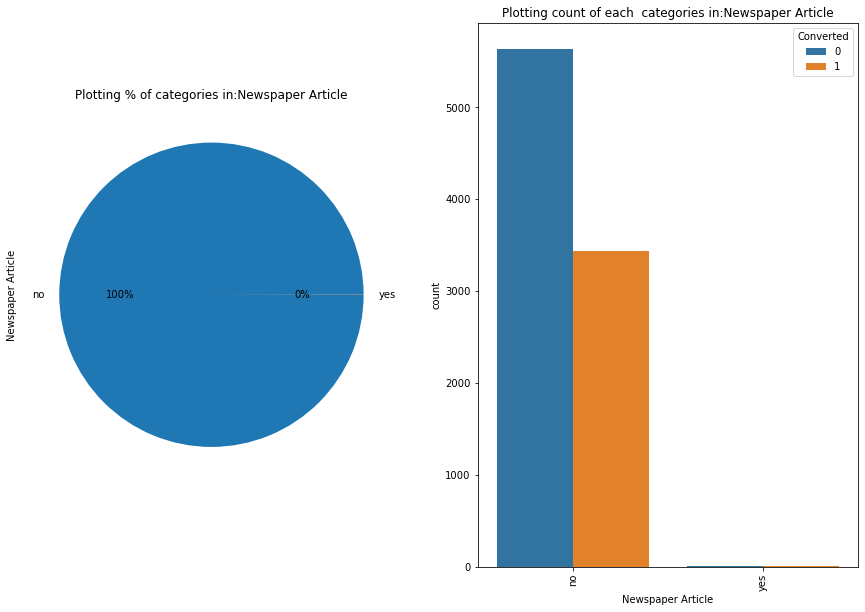

 
7 . X Education Forums
     Conversion rate  Total percent of categories that got converted
no            99.989                                          37.860
yes            0.011                                           0.000


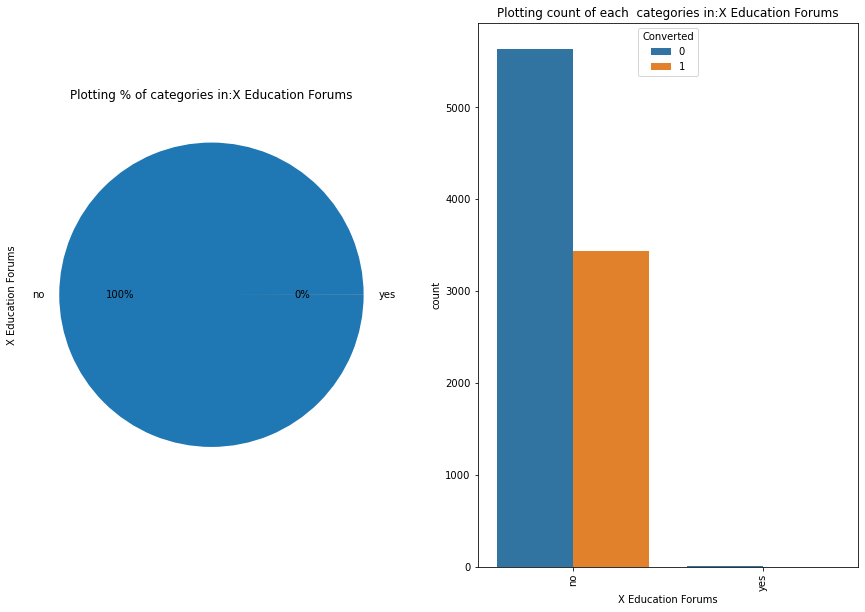

 
8 . Newspaper
     Conversion rate  Total percent of categories that got converted
no            99.989                                          37.860
yes            0.011                                           0.000


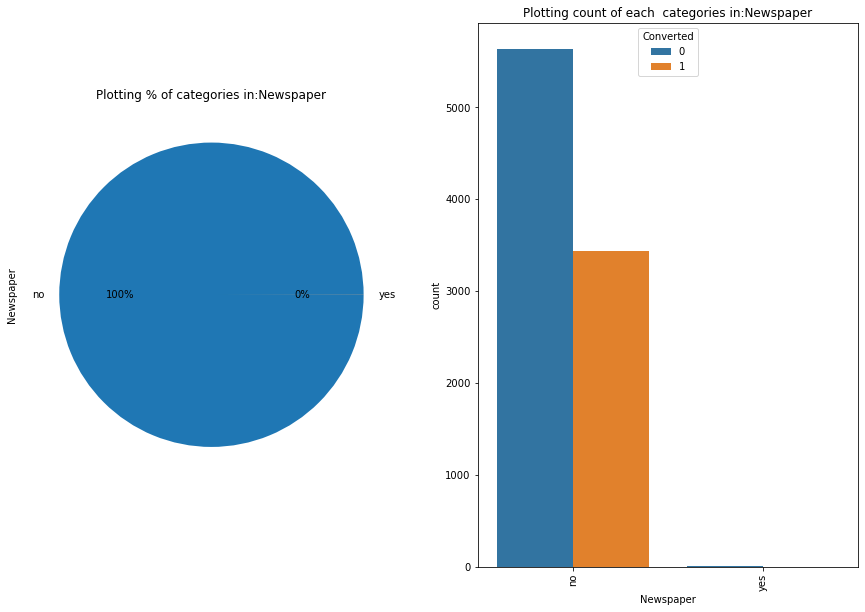

 
9 . Digital Advertisement
     Conversion rate  Total percent of categories that got converted
no            99.956                                          37.861
yes            0.044                                          25.000


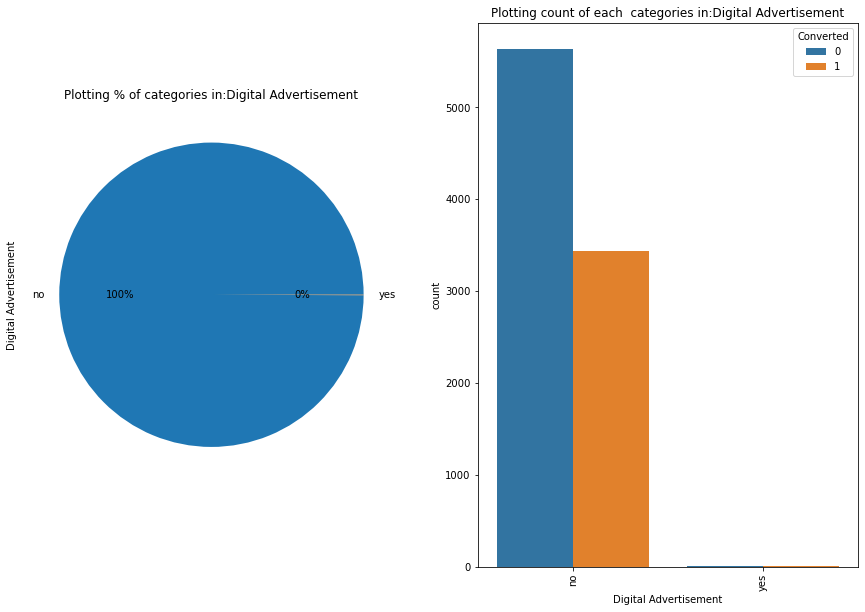

 
10 . Through Recommendations
     Conversion rate  Total percent of categories that got converted
no            99.923                                          37.829
yes            0.077                                          71.429


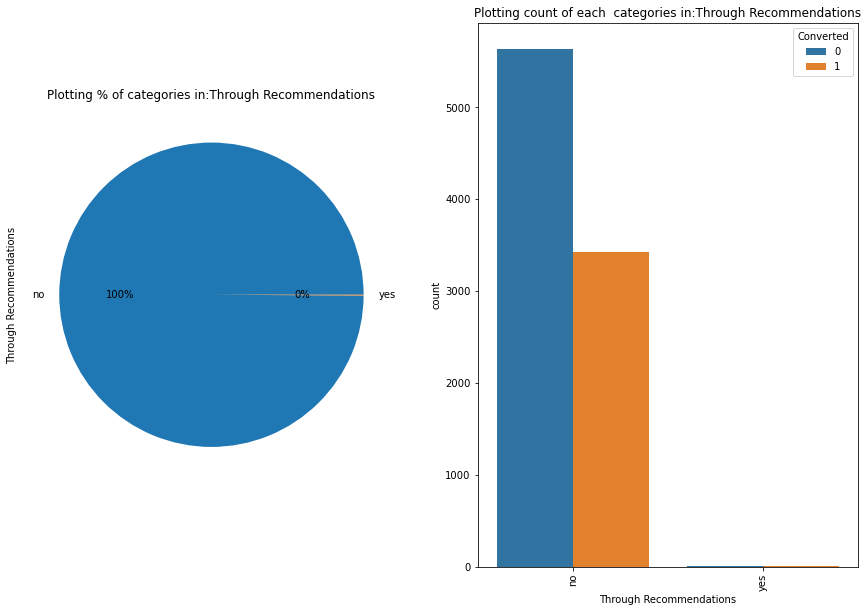

 
11 . A free copy of Mastering The Interview
     Conversion rate  Total percent of categories that got converted
no            68.173                                          38.878
yes           31.827                                          35.665


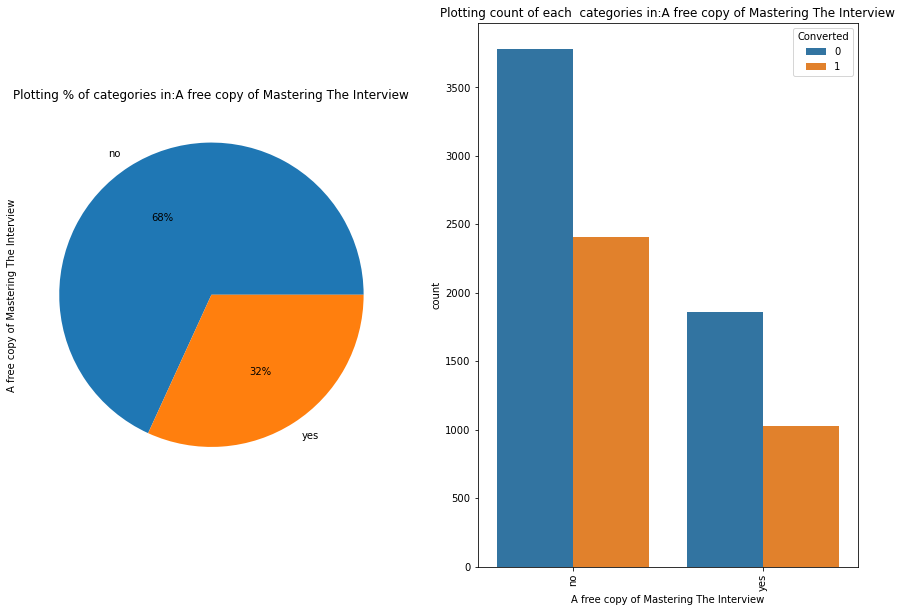

 
12 . Last Notable Activity
                              Conversion rate  \
modified                               36.004   
email opened                           31.111   
sms sent                               23.716   
page visited on website                 3.505   
olark chat conversation                 2.017   
email link clicked                      1.907   
email bounced                           0.661   
unsubscribed                            0.496   
unreachable                             0.353   
had a phone conversation                0.154   
email marked spam                       0.022   
approached upfront                      0.011   
email received                          0.011   
form submitted on website               0.011   
resubscribed to emails                  0.011   
view in browser link clicked            0.011   

                              Total percent of categories that got converted  
modified                                                  

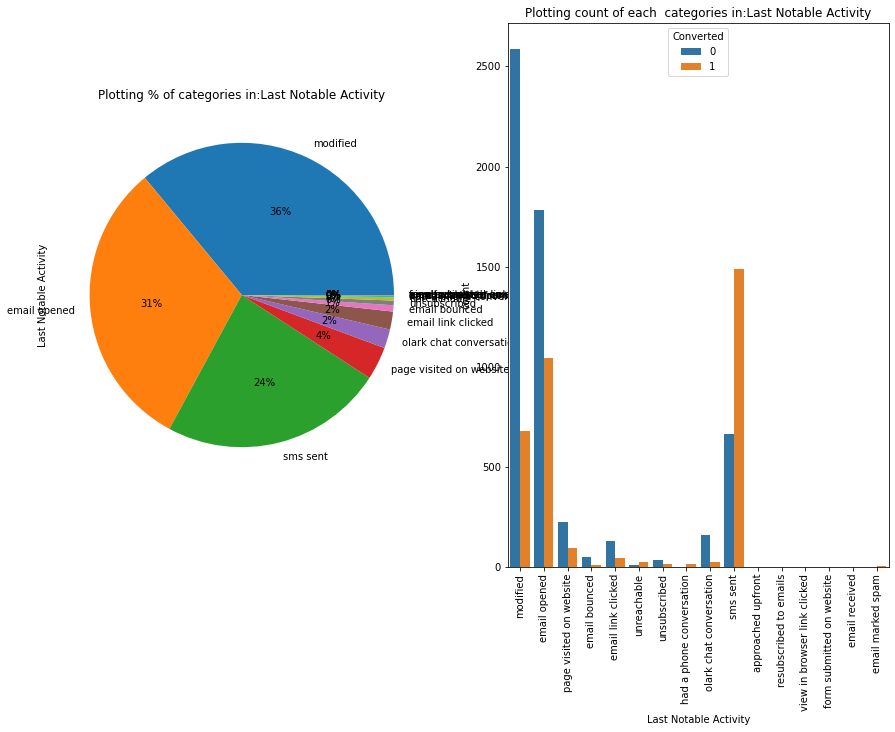

 
13 . Lead Source
                   Conversion rate  \
google                      31.662   
direct traffic              28.025   
olark chat                  19.319   
organic search              12.718   
reference                    4.882   
welingak website             1.422   
referral sites               1.378   
facebook                     0.342   
bing                         0.066   
click2call                   0.044   
live chat                    0.022   
press_release                0.022   
social media                 0.022   
welearn                      0.011   
welearnblog_home             0.011   
pay per click ads            0.011   
testone                      0.011   
blog                         0.011   
nc_edm                       0.011   
youtubechannel               0.011   

                   Total percent of categories that got converted  
google                                                     39.923  
direct traffic                                

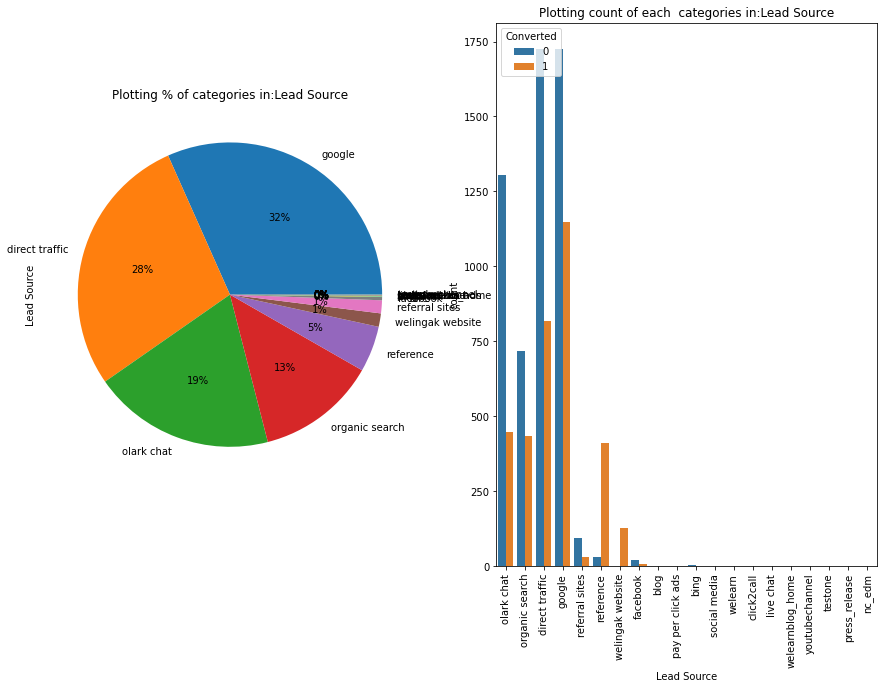

 
14 . Specialization
                                   Conversion rate  \
Missing                                     36.169   
finance management                          10.569   
human resource management                    9.224   
marketing management                         9.070   
operations management                        5.499   
business administration                      4.397   
it projects management                       4.034   
supply chain management                      3.813   
banking, investment and insurance            3.692   
media and advertising                        2.226   
travel and tourism                           2.226   
international business                       1.940   
healthcare management                        1.719   
hospitality management                       1.223   
e-commerce                                   1.223   
retail management                            1.102   
rural and agribusiness                       0.804   
e-busi

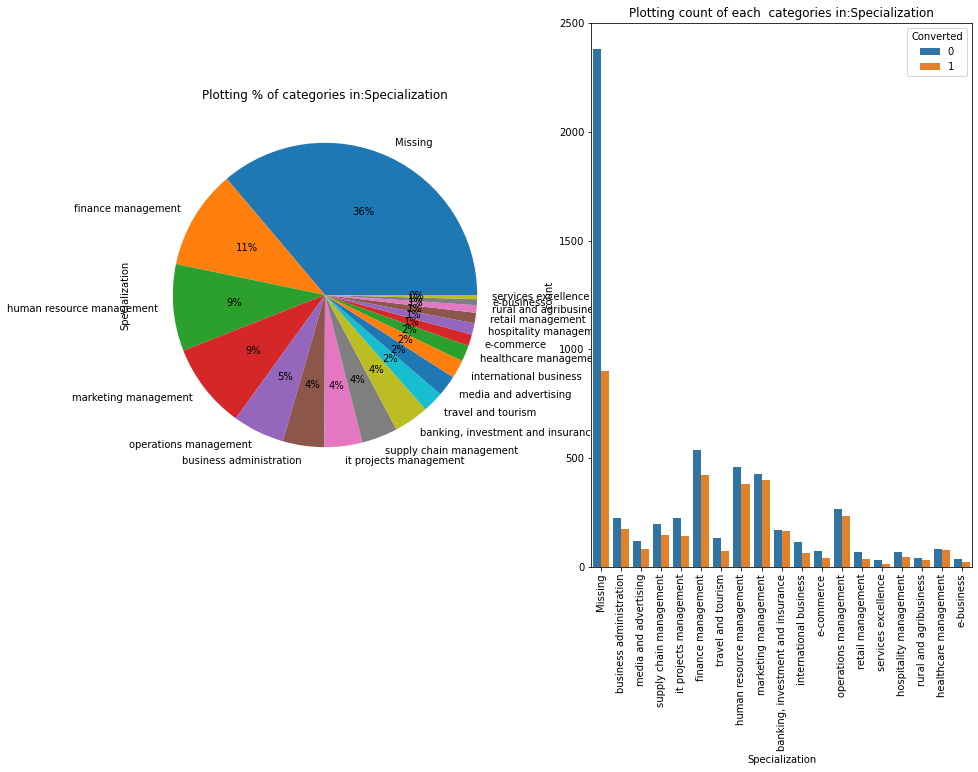

 
15 . What is your current occupation
                      Conversion rate  \
unemployed                     60.348   
Missing                        29.568   
working professional            7.461   
student                         2.270   
other                           0.165   
housewife                       0.099   
businessman                     0.088   

                      Total percent of categories that got converted  
unemployed                                                    42.841  
Missing                                                       13.791  
working professional                                          91.876  
student                                                       35.922  
other                                                         60.000  
housewife                                                    100.000  
businessman                                                   62.500  


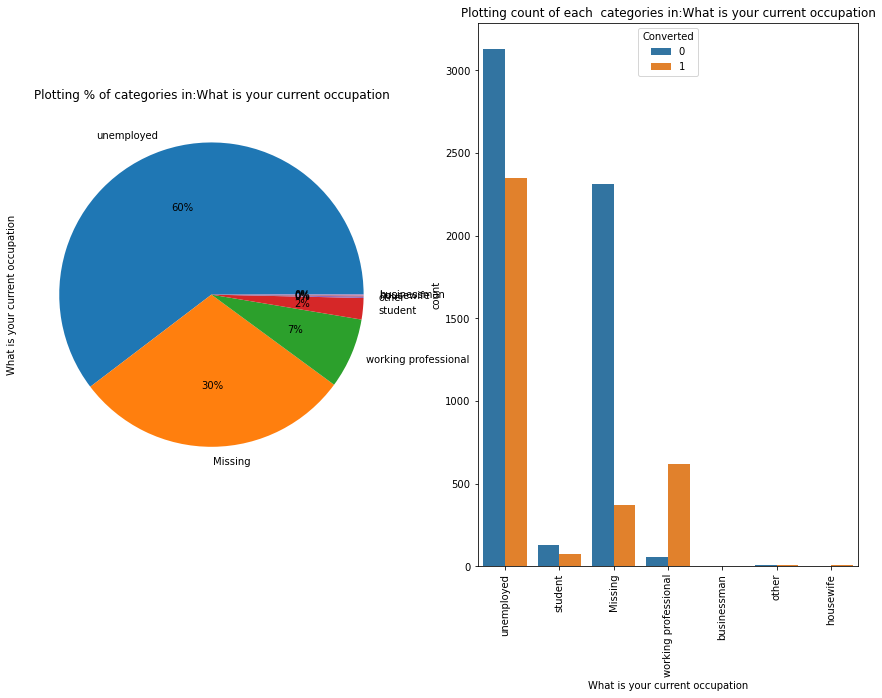

 
16 . What matters most to you in choosing a course
                           Conversion rate  \
better career prospects             70.201   
Missing                             29.777   
flexibility & convenience            0.011   
other                                0.011   

                           Total percent of categories that got converted  
better career prospects                                            48.100  
Missing                                                            13.694  
flexibility & convenience                                         100.000  
other                                                               0.000  


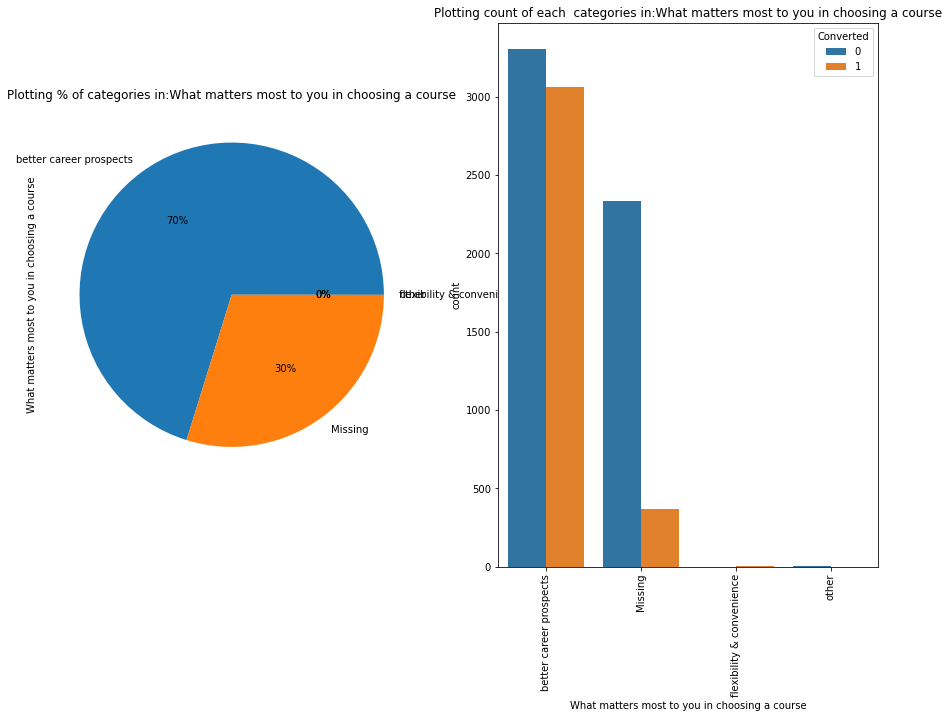

 
17 . Last Activity
                              Conversion rate  \
email opened                           37.822   
sms sent                               29.932   
olark chat conversation                10.712   
page visited on website                 7.053   
converted to lead                       4.717   
email bounced                           3.438   
email link clicked                      2.942   
form submitted on website               1.278   
unreachable                             0.992   
unsubscribed                            0.650   
had a phone conversation                0.276   
view in browser link clicked            0.066   
approached upfront                      0.055   
email received                          0.022   
email marked spam                       0.022   
resubscribed to emails                  0.011   
visited booth in tradeshow              0.011   

                              Total percent of categories that got converted  
email opened     

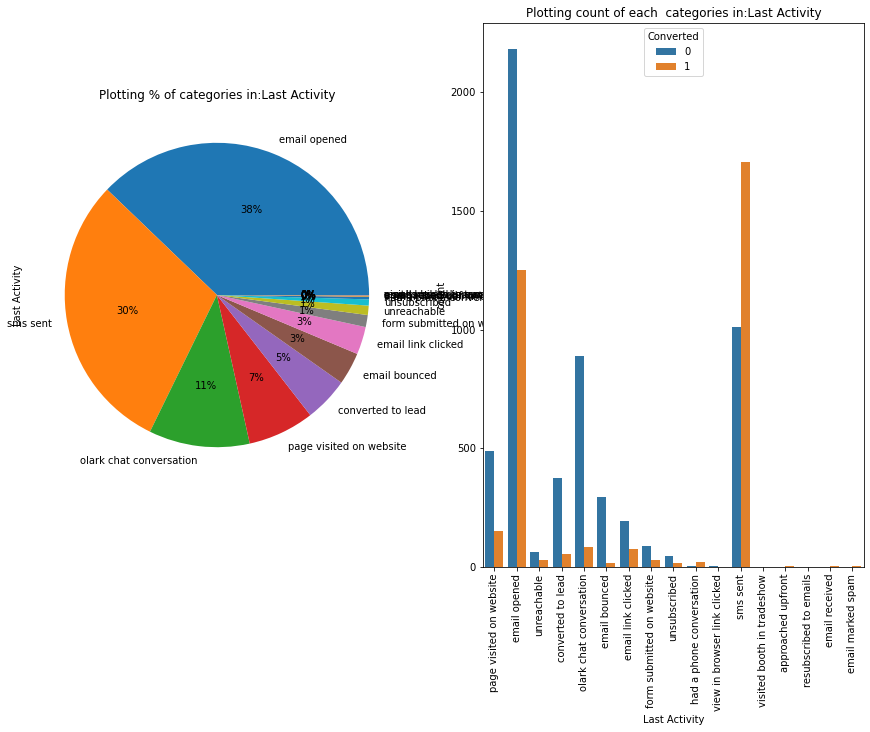

 
18 . Converted
   Conversion rate  Total percent of categories that got converted
0           62.145                                           0.000
1           37.855                                         100.000


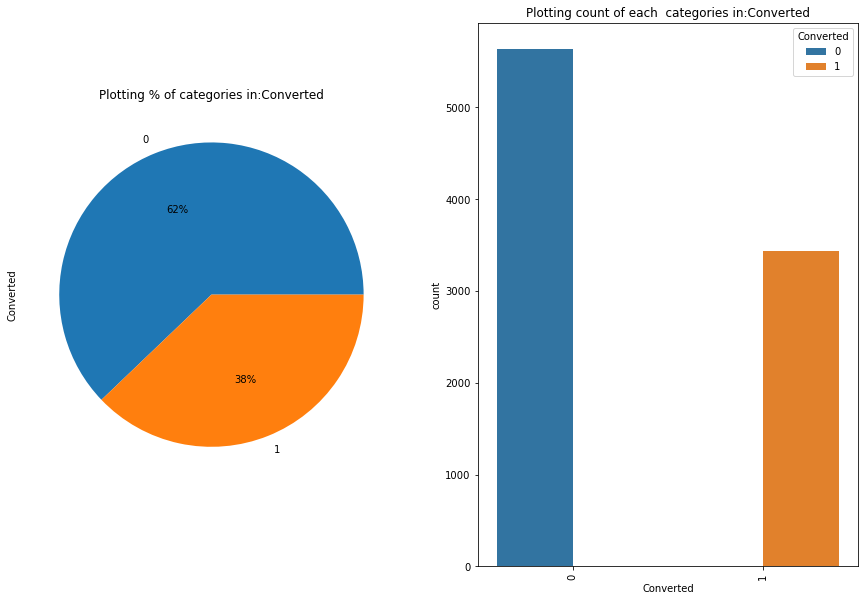

In [48]:
bivariate(cat_df)

#### Observations:
- Conversion rate is 38%
- Among converted customers 54% were on landing page submission followed by api lead origins.
- More than 90% of customers who opted to get emails, calls got converted.
- 68% of the customers who didn't opt for A free copy of Mastering The Interview got converted.
- Among converted customers 60% were unemployed.
- Most of the converted customers are looking for better career prospects.


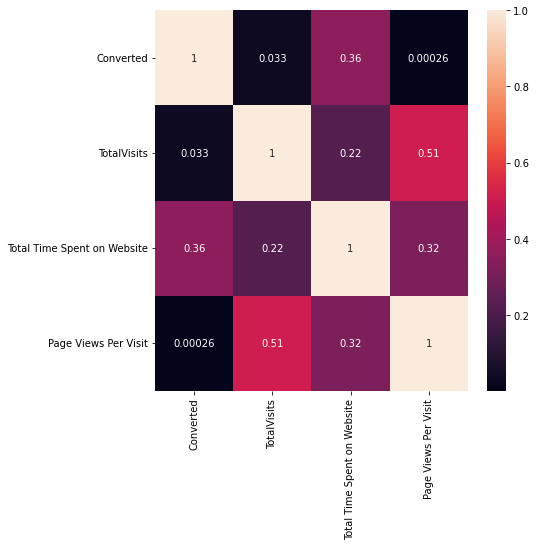

In [49]:
# To check the correlation among varibles
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
#Continuous variables Analysis
num_df = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000,9074.000,9074.000
mean,3.456,482.887,2.370
std,4.859,545.257,2.161
min,0.000,0.000,0.000
25%,1.000,11.000,1.000
50%,3.000,246.000,2.000
75%,5.000,922.750,3.200
90%,7.000,1373.000,5.000
99%,17.000,1839.000,9.000
max,251.000,2272.000,55.000


### Data Preparation for Modelling 

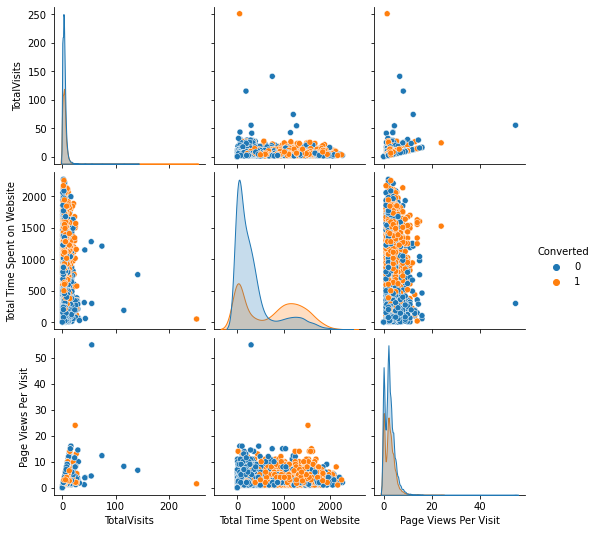

In [51]:
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

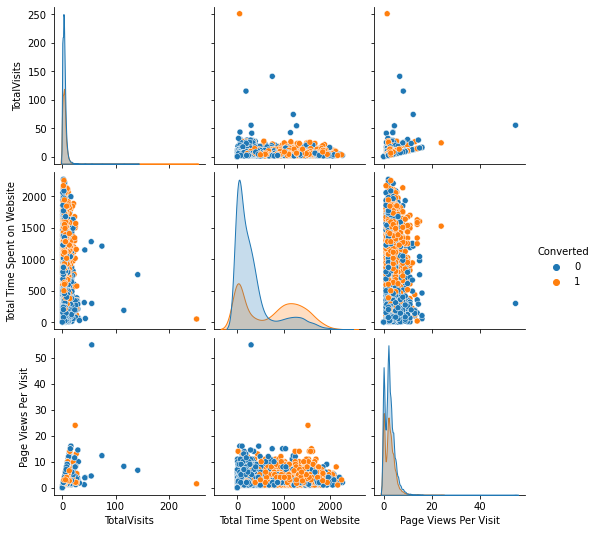

In [52]:
Num= df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(Num,diag_kind='kde',hue='Converted')
plt.show()

### Dummy Variables

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [54]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
# Dummy variable creation using the 'get_dummies'
dum_var = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Concate the dummy with the df data
df_dum = pd.concat([df, dum_var], axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.000,0,0.000,page visited on website,Missing,Missing,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.000,674,2.500,email opened,india,Missing,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.000,1532,2.000,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,landing page s

In [56]:
df_dum = df_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.000,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.000,674,2.500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.000,1532,2.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.000,305,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.000,1428,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.000,1845,2.670,1,0,0,0,0,0,0,0,0,0,0,0,1,

In [57]:
df_dum.shape

(9074, 83)

###  Test-Train Split

In [58]:
#import the sklearn library 
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X
X = df_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.000,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.000,674,2.500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.000,1532,2.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.000,305,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.000,1428,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
# Putting response variable to y
y = df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [62]:
#Import minmax scalar
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.008,0.178,0.083,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0.008,0.085,0.083,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0.008,0.620,0.083,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.020,0.712,0.104,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Looking at Correlations

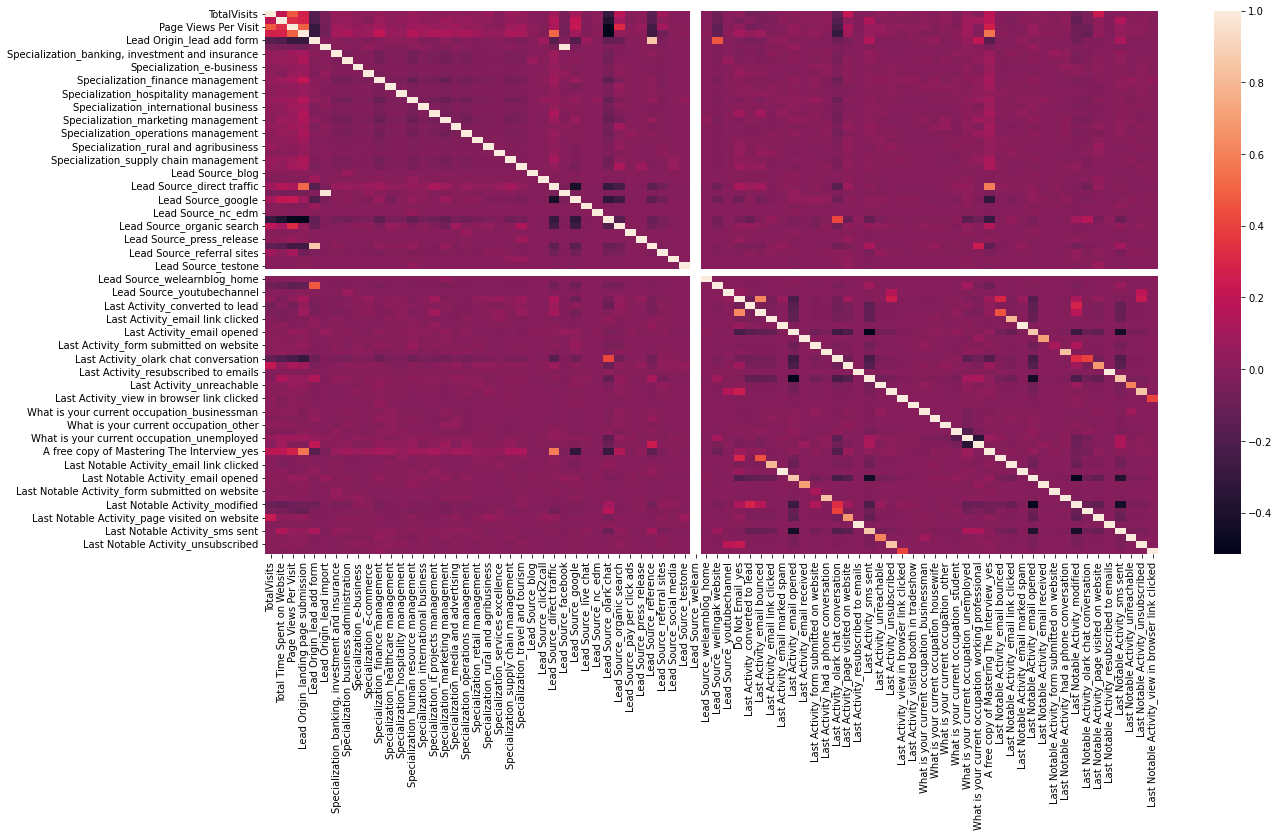

In [64]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr())
plt.show()

#### Dropping highly correlated dummy variables becomes difficult due to large no of variables so we will first perform RFE and accordingly  drop them 

### Feature Selection Using RFE-Model Building 

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
       False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_landing page submission', False, 23),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 52),
 ('Specialization_banking, investment and insurance', False, 20),
 ('Specialization_business administration', False, 31),
 ('Specialization_e-business', False, 19),
 ('Specialization_e-commerce', False, 22),
 ('Specialization_finance management', False, 26),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 47),
 ('Specialization_human resource management', False, 27),
 ('Specialization_international business', False, 35),
 ('Specialization_it projects management', False, 25),
 ('Specialization_marketing management', False, 21),
 ('Specialization_media and advertising', False, 39),
 ('Specialization_operations management', False, 29),
 ('Specialization_retail management', False, 38),
 ('Specia

In [69]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [70]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [71]:
import statsmodels.api as sm

##### Assessing the model with StatsModels

In [72]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Thu, 11 Aug 2022   Deviance:                       5394.7
Time:                        13:15:55   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              3.9224      0.145     27.106      0.000       3.639       4.206
Lead Origin_lead add form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_direct traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_welingak website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_had a phone conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_working professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_email link clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_email opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_olark chat conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_page visited on website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

- 'What is your current occupation_housewife' variable has the highest p-value. Hence this variable can be dropped

### Checking VIFs

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_modified,1.740
7,Last Activity_olark chat conversation,1.680
0,Total Time Spent on Website,1.560
1,Lead Origin_lead add form,1.480
2,Lead Source_direct traffic,1.440
4,Lead Source_welingak website,1.330
13,Last Notable Activity_olark chat conversation,1.320
11,Last Notable Activity_email opened,1.300
9,What is your current occupation_working profes...,1.170
5,Do Not Email_yes,1.130


- All the above variables has the VIF<5

In [75]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Thu, 11 Aug 2022   Deviance:                       5403.0
Time:                        13:15:55   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              3.9239      0.145     27.139      0.000       3.641       4.207
Lead Origin_lead add form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_direct traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_welingak website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_working professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_email link clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_email opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_olark chat conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_page visited on website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

'Lead Source_referral sites' variable has the highest p-value among all the variables. Hence this variable can be dropped.

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,1.740
7,Last Activity_olark chat conversation,1.680
0,Total Time Spent on Website,1.560
1,Lead Origin_lead add form,1.470
2,Lead Source_direct traffic,1.440
4,Lead Source_welingak website,1.330
12,Last Notable Activity_olark chat conversation,1.320
10,Last Notable Activity_email opened,1.290
8,What is your current occupation_working profes...,1.170
5,Do Not Email_yes,1.130


In [78]:
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.4
Date:                Thu, 11 Aug 2022   Deviance:                       5406.9
Time:                        13:15:55   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2784      0.076     -3.659      0.000      -0.428      -0.129
Total Time Spent on Website                              3.9210      0.145     27.133      0.000       3.638       4.204
Lead Origin_lead add form                                3.4574      0.219     15.789      0.000       3.028       3.887
Lead Source_direct traffic                              -0.5319      0.077     -6.876      0.000      -0.683      -0.380
Lead Source_welingak website                             2.0696      0.758      2.729      0.006       0.583       3.556
Do Not Email_yes                                        -1.8355      0.175    -10.501      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.6872      0.786      2.147      0.032       0.147       3.228
Last Activity_olark chat conversation                   -0.8147      0.187     -4.348      0.000      -1.182      -0.447
What is your current occupation_working professional     2.6609      0.185     14.351      0.000       2.298       3.024
Last Notable Activity_email link clicked                -1.7221      0.256     -6.714      0.000      -2.225      -1.219
Last Notable Activity_email opened                      -1.3790      0.087    -15.862      0.000      -1.549      -1.209
Last Notable Activity_modified                          -1.9297      0.095    -20.332      0.000      -2.116      -1.744
Last Notable Activity_olark chat conversation           -1.6098      0.364     -4.417      0.000      -2.324      -0.896
Last Notable Activity_page visited on website           -1.6922      0.196     -8.623      0.000      -2.077      -1.308
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_modified,1.730
6,Last Activity_olark chat conversation,1.680
0,Total Time Spent on Website,1.560
1,Lead Origin_lead add form,1.470
2,Lead Source_direct traffic,1.430
3,Lead Source_welingak website,1.330
11,Last Notable Activity_olark chat conversation,1.320
9,Last Notable Activity_email opened,1.290
7,What is your current occupation_working profes...,1.170
4,Do Not Email_yes,1.130


### Creating Prediction 

In [81]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.184
1012   0.587
9226   0.099
4750   0.835
7987   0.513
1281   0.811
2880   0.161
4971   0.917
7536   0.785
1248   0.474
dtype: float64

In [82]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18391569, 0.58657132, 0.09902525, 0.83486235, 0.51254007,
       0.81073997, 0.16105248, 0.91701694, 0.78496251, 0.47425379])

In [83]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.184
1,0,0.587
2,0,0.099
3,1,0.835
4,1,0.513


In [84]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.184,0
1,0,0.587,1
2,0,0.099,0
3,1,0.835,1
4,1,0.513,1


### Model Evaluation 

In [85]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [86]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [87]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7942056369075736

### Metrics beyond simply accuracy¶

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6594439901880621

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.8786171574903969

In [92]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.12138284250960307


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.7728797316722569


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8046435272045028


 ### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [95]:
# ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

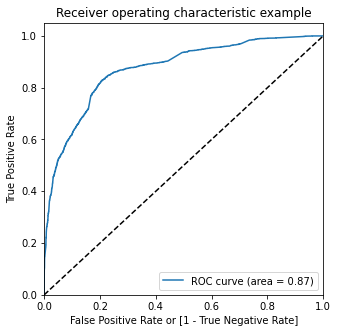

In [97]:
#Plotting ROC Function 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.184,0,1,1,0,0,0,0,0,0,0,0
1,0,0.587,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099,0,1,0,0,0,0,0,0,0,0,0
3,1,0.835,1,1,1,1,1,1,1,1,1,1,0
4,1,0.513,1,1,1,1,1,1,1,0,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.000,0.000,0.385,1.000,0.000
0.100,0.100,0.556,0.970,0.297
0.200,0.200,0.747,0.883,0.662
0.300,0.300,0.799,0.848,0.769
0.400,0.400,0.807,0.790,0.818
0.500,0.500,0.794,0.659,0.879
0.600,0.600,0.790,0.577,0.924
0.700,0.700,0.781,0.506,0.954
0.800,0.800,0.757,0.413,0.972
0.900,0.900,0.712,0.268,0.990


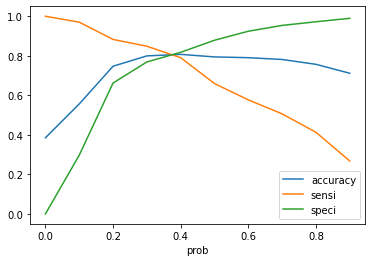

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.184,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.587,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.835,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513,1,1,1,1,1,1,1,0,0,0,0,1


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807589356006928

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3148,  757],
       [ 465, 1981]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8098937040065413

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.806145966709347

In [107]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.193854033290653


In [108]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7235208181154127


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.871298090229726


### Making predictions on the test set

In [110]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [111]:
# Substituting all the columns in the final train model
col = X_train.columns

In [112]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.000,0.071,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.000,0.680,0,1,0,0,0,0,1,0,1,0,0,0
7936,1.000,0.033,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.000,0.000,1,0,0,0,0,0,0,0,0,1,0,0
3830,1.000,0.074,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.000,0.372,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.000,0.265,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.000,0.600,0,1,0,0,0,0,0,0,0,0,0,0
7155,1.000,0.231,0,1,0,0,0,0,0,0,0,1,0,0


In [113]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201
1,1,0.958
2,0,0.178
3,1,0.777
4,0,0.203


In [114]:
# Making prediction using cut off 0.37
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.201,0
1,1,0.958,1
2,0,0.178,0
3,1,0.777,1
4,0,0.203,0
...,...,...,...
2718,0,0.321,0
2719,0,0.237,0
2720,1,0.824,1
2721,0,0.138,0


In [115]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.799118619170033

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1393,  341],
       [ 206,  783]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.7917087967644085

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.8033448673587081

### Using sklearn utilities for the same

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7235208181154127

In [122]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098937040065413

### Precision-Recall

In [123]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [124]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7728797316722569

In [125]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6594439901880621

### Precision and recall tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

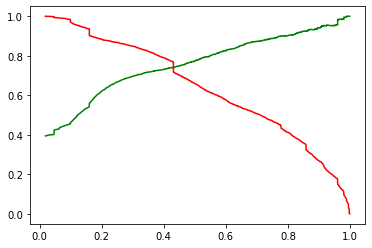

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.184,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.587,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.835,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513,1,1,1,1,1,1,1,0,0,0,0,1


In [131]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807589356006928

In [132]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3214,  691],
       [ 531, 1915]], dtype=int64)

In [133]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [134]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7348426707597852

In [135]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7829108748977923

### Prediction on Test set

In [136]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201
1,1,0.958
2,0,0.178
3,1,0.777
4,0,0.203


In [137]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.201,0
1,1,0.958,1
2,0,0.178,0
3,1,0.777,1
4,0,0.203,0
...,...,...,...
2718,0,0.321,0
2719,0,0.237,0
2720,1,0.824,1
2721,0,0.138,0


# # Check the overall accuracy


In [138]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8024237972824091

In [139]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1426,  308],
       [ 230,  759]], dtype=int64)

In [140]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [141]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.711340206185567

In [142]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7674418604651163

With the current cut off as 0.41 we have Precision around 71% and Recall around 77%.

## Conclusion
It was observed that the factors that made the biggest difference in the potential purchasers are - 
1. Total time spent on the website
2. When the lead origin is lead add form
3. When the lead source was -
   - Direct traffic
   - Welingak website
4. When the customer opted for not to email
5. When the customer current occupation is working professional.
6. When the customer says that he is chosing this course for better career prospects.
7. When the last activity was -
   - Olark chat conversation
   - Phone conversation
8. When the last notable activity was -
   - modified 
   - email opened
   - page visited on website
   - email link clicked
   - olark chat conversation
   
Keeping this in mind, the X Education can thrive as they have an exceptionally high opportunity to get almost every one of the likely purchasers to adjust their perspective and purchase their courses.
